In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import *
import seaborn as sns
from sklearn.metrics import *
import matplotlib.pyplot as plt


imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
urltrain = "cs-training.csv"
train = pd.read_csv(urltrain)
train = train.drop(train.iloc[:,0:1],axis=1)
Y_train = train['SeriousDlqin2yrs']
X_train = train.drop(['SeriousDlqin2yrs'], axis = 1)

In [3]:
urltest = "cs-test.csv"
test = pd.read_csv(urltest)
test = test.drop(columns = {"SeriousDlqin2yrs"}, axis = 1)
X_test = test.drop(test.iloc[:,0:1],axis=1)

In [4]:
url_test_labels = "sampleEntry.csv"
label_proba = pd.read_csv(url_test_labels)
label_proba = label_proba.drop(label_proba.iloc[:, 0:1],axis = 1).values
Y_test = []
for i in label_proba:
  if(i > 0.5):
    Y_test.append(1)
  else:
    Y_test.append(0)

In [5]:
X_test['labels'] = Y_test

In [6]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean = imp_mean.fit(X_train)
X_train = imp_mean.transform(X_train)

X_test = X_test.dropna()

Y_test = X_test['labels']
X_test = X_test.drop(['labels'], axis = 1)

In [7]:
sc = StandardScaler()
sc = sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

/Users/ashwinsheoran/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [8]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.30, random_state = 0)

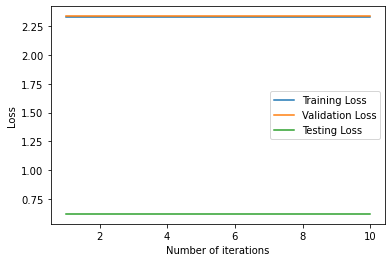

Accuracy Score on training set :- 0.9324666666666667


In [9]:
model = GaussianNB()
n_unique = np.unique(Y_train)
batch_size = 600
training_loss = []
validation_loss = []
testing_loss = []
iteration = []
for i in range(10):
  iteration.append(i+1)
  for j in range(0,X_train.shape[0],batch_size):
    model.partial_fit(X_train[j:j+batch_size,:],Y_train[j:j+batch_size],n_unique)

  training_loss.append(log_loss(Y_train,model.predict(X_train)))
  validation_loss.append(log_loss(Y_val,model.predict(X_val)))
  testing_loss.append(log_loss(Y_test,model.predict(X_test)))

plt.plot(iteration,training_loss,label = "Training Loss")
plt.plot(iteration,validation_loss,label = "Validation Loss")
plt.plot(iteration,testing_loss,label = "Testing Loss")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

# model.fit(X_train,Y_train)
arr1 = model.predict(X_train)
score = accuracy_score(Y_train,arr1)
print("Accuracy Score on training set :- " + str(score))
# print(classification_report(Y_train,arr1))
# cm = confusion_matrix(Y_train,arr1)
# sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

In [10]:
# weights = model.coef_
# weight = []
# for i in weights:
#   for j in i:
#     weight.append(j)
# arr = ["RevolvingUtilizationOfUnsecuredLines","age","NumberOfTime30-59DaysPastDueNotWorse","DebtRatio","MonthlyIncome","NumberOfOpenCreditLinesAndLoans","NumberOfTimes90DaysLate","NumberRealEstateLoansOrLines","NumberOfTime60-89DaysPastDueNotWorse","NumberOfDependents"]
# plt.plot(weight,arr)
# plt.show()

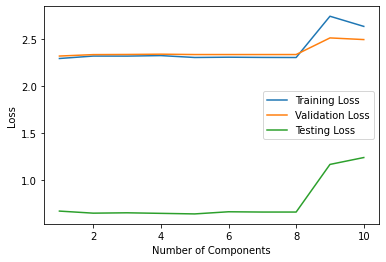

Accuracy score on Training set 0.9326380952380953
Accuracy score on Validation set 0.9322
Accuracy score on Testing set 0.9813513513513513


In [13]:
from sklearn.decomposition import PCA

training_loss = []
validation_loss = []
testing_loss = []
iteration = []
for i in range(1,11):
  iteration.append(i)
  pca = PCA(n_components=i)
  x_train_pca = pca.fit_transform(X_train)
  x_validate_pca = pca.fit_transform(X_val)
  x_test_pca = pca.fit_transform(X_test)
  model = GaussianNB()
  model.fit(x_train_pca,Y_train)
  training_loss.append(log_loss(Y_train,model.predict(x_train_pca)))
  validation_loss.append(log_loss(Y_val,model.predict(x_validate_pca)))
  testing_loss.append(log_loss(Y_test,model.predict(x_test_pca)))


plt.plot(iteration,training_loss,label = "Training Loss")
plt.plot(iteration,validation_loss,label = "Validation Loss")
plt.plot(iteration,testing_loss,label = "Testing Loss")
plt.xlabel("Number of Components")
plt.ylabel("Loss")
plt.legend()
plt.show()

pca = PCA(n_components = 4)
x_train_pca = pca.fit_transform(X_train)
x_validate_pca = pca.fit_transform(X_val)
x_test_pca = pca.fit_transform(X_test)
model = GaussianNB()
model.fit(x_train_pca,Y_train)
print("Accuracy score on Training set " + str(accuracy_score(Y_train,model.predict(x_train_pca))))
print("Accuracy score on Validation set " + str(accuracy_score(Y_val,model.predict(x_validate_pca))))
print("Accuracy score on Testing set " + str(accuracy_score(Y_test,model.predict(x_test_pca))))